In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
import json
import zipfile
from io import BytesIO

In [2]:
# Download Energie Reporter zip:

zip_file_url = 'https://opendata.geoimpact.ch/energiereporter/energyreporter_historized.zip'
zip_file = zipfile.ZipFile(BytesIO(requests.get(zip_file_url).content))

print('\n'.join([str(x) for x in zip_file.infolist()]))

<ZipInfo filename='energyreporter_municipality_historized.csv' compress_type=deflate filemode='-rw-r--r--' file_size=13528375 compress_size=2710066>
<ZipInfo filename='energyreporter_canton_historized.csv' compress_type=deflate filemode='-rw-r--r--' file_size=161060 compress_size=52246>
<ZipInfo filename='energyreporter_national_historized.csv' compress_type=deflate filemode='-rw-r--r--' file_size=8462 compress_size=2761>
<ZipInfo filename='README.txt' compress_type=deflate filemode='-rwxr-xr-x' file_size=4090 compress_size=1636>


In [3]:
# Load municipal, cantonal, and national data into dataframes:

municipality_df = pd.read_csv(BytesIO(zip_file.read('energyreporter_municipality_historized.csv')))
canton_df = pd.read_csv(BytesIO(zip_file.read('energyreporter_canton_historized.csv')))
national_df = pd.read_csv(BytesIO(zip_file.read('energyreporter_national_historized.csv')))

print('All columns:')
print(municipality_df.columns)

print()
print('------------------------')
print('Statistics for all Energie Reporter KPIs:')
municipality_df[[
    'electric_car_share', 'electric_cars_per_charging_spot', 
    'solar_potential_usage', 'renewable_heating_share', 
    'elec_consumption_mwh_per_year_per_capita', 'renelec_production_mwh_per_year_per_capita'
]].describe()

All columns:
Index(['bfs_nr', 'municipality', 'canton', 'bfs_municipality_type_2012_25',
       'energyreporter_date', 'electric_car_share', 'electric_car_count',
       'electric_car_share_last_change', 'electric_car_charging_spot_count',
       'electric_cars_per_charging_spot',
       'electric_car_charging_spot_last_change', 'solar_potential_usage',
       'solar_power_installed_kwp', 'solar_potential_usage_last_change',
       'renewable_heating_share', 'renewable_heating_count',
       'non_renewable_heating_count', 'no_heating_count',
       'renewable_heating_share_coverage',
       'renewable_heating_share_last_change',
       'elec_consumption_mwh_per_year_per_capita',
       'elec_consumption_households_mwh_per_year_per_capita',
       'elec_consumption_mwh_per_year',
       'elec_consumption_households_mwh_per_year',
       'elec_consumption_date_from', 'elec_consumption_date_until',
       'renelec_production_mwh_per_year_per_capita',
       'renelec_production_mwh_per_yea

,electric_car_share,electric_cars_per_charging_spot,solar_potential_usage,renewable_heating_share,elec_consumption_mwh_per_year_per_capita,renelec_production_mwh_per_year_per_capita
count,83705.000000,7918.000000,83705.000000,83705.000000,27743.000000,17048.000000
mean,0.021918,22.147992,0.058531,0.390200,5.919345,17.710219
std,0.013522,25.984784,0.038927,0.161412,4.048053,138.850472
min,0.000000,0.000000,0.000000,0.024606,1.784900,0.000000
25%,0.012355,7.500000,0.034105,0.266138,4.010600,0.422700
50%,0.019697,14.750000,0.051517,0.388843,4.849600,0.695300
75%,0.029057,27.000000,0.074920,0.500000,6.266100,1.372450
max,0.134780,365.000000,0.692688,0.962963,95.609000,4371.583300


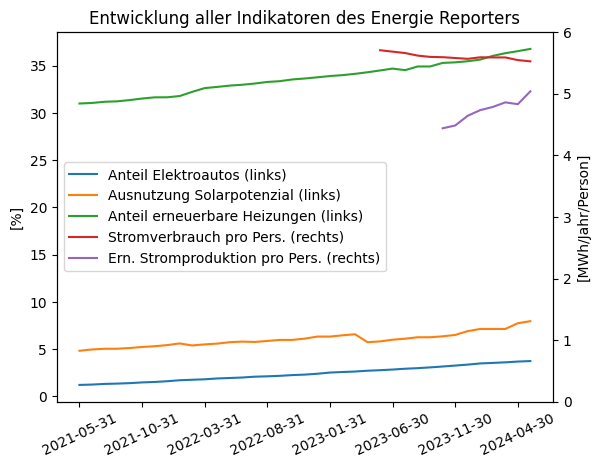

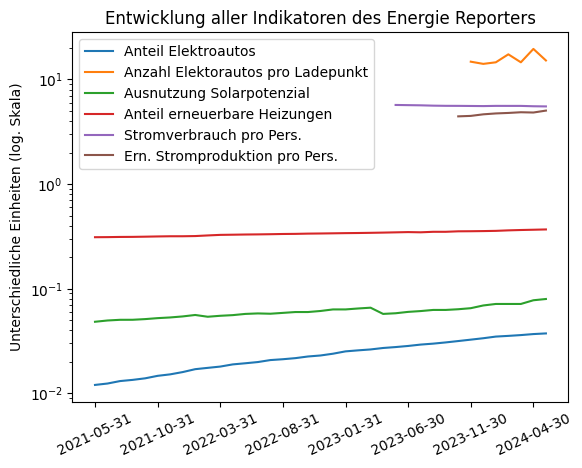

In [29]:
# Entwicklung aller Indikatoren des Energie Reporters

df = national_df.set_index('energyreporter_date')[[
    'electric_car_share', 'electric_cars_per_charging_spot',
    'solar_potential_usage', 'renewable_heating_share', 
    'elec_consumption_mwh_per_year_per_capita', 'renelec_production_mwh_per_year_per_capita'
]][2:]

fig, ax = plt.subplots()
df[['electric_car_share', 'solar_potential_usage', 'renewable_heating_share']].multiply(100).plot(ax=ax)
df[['elec_consumption_mwh_per_year_per_capita', 'renelec_production_mwh_per_year_per_capita']].plot(ax=ax, secondary_y=True)
plt.title('Entwicklung aller Indikatoren des Energie Reporters')
ax.set_ylabel('[%]')
ax.right_ax.set_ylabel('[MWh/Jahr/Person]')
ax.set_xlabel('')
ax.tick_params(axis='x', labelrotation=25)
ax.right_ax.set_ylim([0.0, 6.0])
ax.legend(
    ax.get_lines() + ax.right_ax.get_lines(), 
    ['Anteil Elektroautos (links)','Ausnutzung Solarpotenzial (links)','Anteil erneuerbare Heizungen (links)',
     'Stromverbrauch pro Pers. (rechts)','Ern. Stromproduktion pro Pers. (rechts)'], 
    loc='center left'
)
plt.show()

df.rename(columns={
    'electric_car_share': 'Anteil Elektroautos',
    'electric_cars_per_charging_spot': 'Anzahl Elektorautos pro Ladepunkt',
    'solar_potential_usage': 'Ausnutzung Solarpotenzial',
    'renewable_heating_share': 'Anteil erneuerbare Heizungen',
    'elec_consumption_mwh_per_year_per_capita': 'Stromverbrauch pro Pers.',
    'renelec_production_mwh_per_year_per_capita': 'Ern. Stromproduktion pro Pers.',
}).plot(logy=True)
plt.title('Entwicklung aller Indikatoren des Energie Reporters')
plt.ylabel('Unterschiedliche Einheiten (log. Skala)')
plt.xlabel('')
plt.xticks(rotation=25)
plt.show()

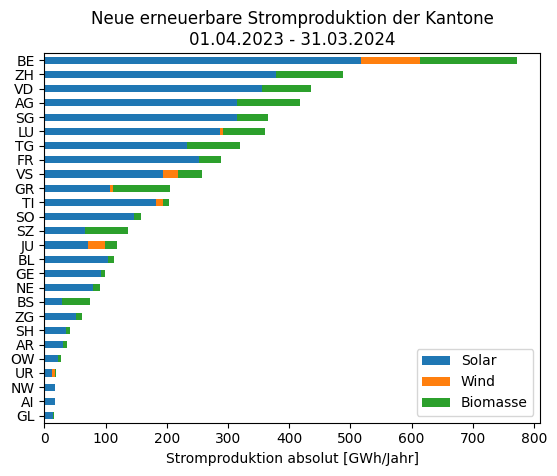

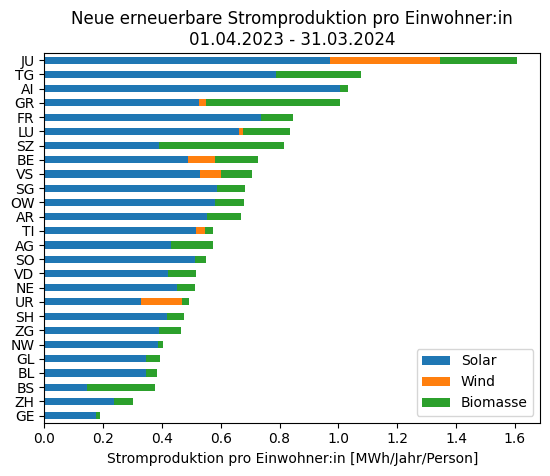

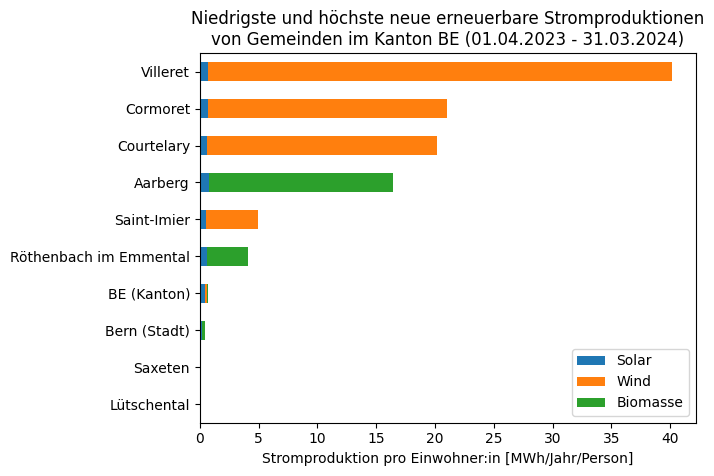

In [111]:
# Neue erneuerbare Stromproduktion:

columns = [
    'renelec_production_mwh_per_year_per_capita', 'renelec_production_mwh_per_year',
    'renelec_production_water_mwh_per_year', 'renelec_production_solar_mwh_per_year',
    'renelec_production_wind_mwh_per_year', 'renelec_production_biomass_mwh_per_year',
    'renelec_production_waste_mwh_per_year'
]
    
df = pd.concat([
    municipality_df.query("canton=='BE' & energyreporter_date=='2024-04-30'").set_index('municipality')[columns].copy(),
    canton_df.query("energyreporter_date=='2024-04-30'").set_index('canton')[columns].copy()
])


# Kantone absolut:
df['tot'] = df[[
    'renelec_production_solar_mwh_per_year','renelec_production_wind_mwh_per_year', 
    'renelec_production_biomass_mwh_per_year'
]].sum(axis=1)
df = df.sort_values('tot')

df2 = df.query("index.str.len() == 2").sort_values('tot')
df2[[
    'renelec_production_solar_mwh_per_year','renelec_production_wind_mwh_per_year', 
    'renelec_production_biomass_mwh_per_year'
]] *= 0.001

df2[[
    'renelec_production_solar_mwh_per_year','renelec_production_wind_mwh_per_year', 
    'renelec_production_biomass_mwh_per_year'
]].rename(columns={
    'renelec_production_solar_mwh_per_year': 'Solar',
    'renelec_production_wind_mwh_per_year': 'Wind',
    'renelec_production_biomass_mwh_per_year': 'Biomasse',
}).plot(kind='barh', stacked=True)
# plt.xlim([0, 20])
plt.xlabel('Stromproduktion absolut [GWh/Jahr]')
plt.title('Neue erneuerbare Stromproduktion der Kantone\n01.04.2023 - 31.03.2024')
plt.show()

# Kantone pro Einwohner:in:
df['capita'] = df.renelec_production_mwh_per_year / df.renelec_production_mwh_per_year_per_capita
df.renelec_production_solar_mwh_per_year /= df.capita
df.renelec_production_wind_mwh_per_year /= df.capita
df.renelec_production_biomass_mwh_per_year /= df.capita
df['tot'] = df[[
    'renelec_production_solar_mwh_per_year','renelec_production_wind_mwh_per_year', 
    'renelec_production_biomass_mwh_per_year'
]].sum(axis=1)
df = df.sort_values('tot')


df3 = df.query("index.str.len() == 2").sort_values('tot')

df3[[
    'renelec_production_solar_mwh_per_year','renelec_production_wind_mwh_per_year', 
    'renelec_production_biomass_mwh_per_year'
]].rename(columns={
    'renelec_production_solar_mwh_per_year': 'Solar',
    'renelec_production_wind_mwh_per_year': 'Wind',
    'renelec_production_biomass_mwh_per_year': 'Biomasse',
}).plot(kind='barh', stacked=True)
# plt.xlim([0, 20])
plt.xlabel('Stromproduktion pro Einwohner:in [MWh/Jahr/Person]')
plt.title('Neue erneuerbare Stromproduktion pro Einwohner:in\n01.04.2023 - 31.03.2024')
plt.show()

# Gemeinden pro Einwohner:in:
df4 = pd.concat([
    df.head(2), 
    df.tail(6), 
    df.query("index == 'Bern'"),
    df.query("index == 'BE'")
]).sort_values('tot', ascending=True)

df4 = df4.rename(index={
    'BE': 'BE (Kanton)',
    'Bern': 'Bern (Stadt)'
})

df4[[
    'renelec_production_solar_mwh_per_year','renelec_production_wind_mwh_per_year', 
    'renelec_production_biomass_mwh_per_year'
]].rename(columns={
    'renelec_production_solar_mwh_per_year': 'Solar',
    'renelec_production_wind_mwh_per_year': 'Wind',
    'renelec_production_biomass_mwh_per_year': 'Biomasse',
}).plot(kind='barh', stacked=True)
# plt.xlim([0, 20])
plt.xlabel('Stromproduktion pro Einwohner:in [MWh/Jahr/Person]')
plt.title('Niedrigste und höchste neue erneuerbare Stromproduktionen\nvon Gemeinden im Kanton BE (01.04.2023 - 31.03.2024)')
plt.legend(loc='lower right')
plt.show()


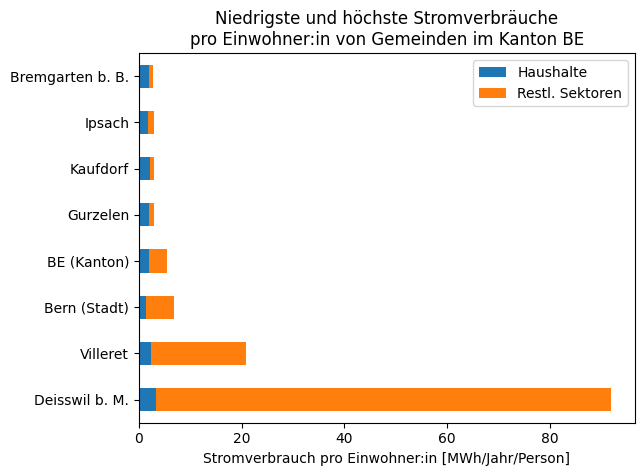

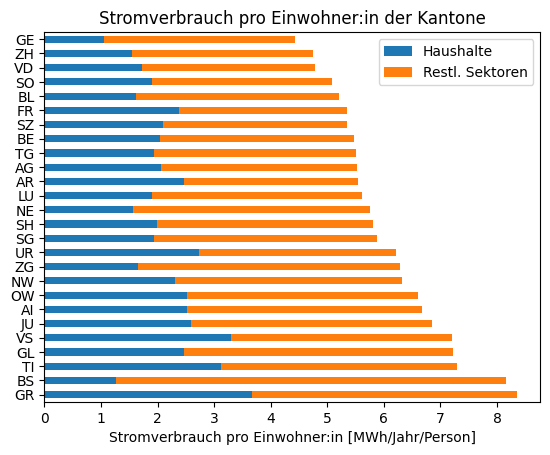

In [113]:
# Stromverbrauch:
columns = [
    'elec_consumption_mwh_per_year_per_capita', 
    'elec_consumption_households_mwh_per_year_per_capita'
]

df = pd.concat([
    municipality_df.query("canton=='BE' & energyreporter_date=='2024-04-30'").set_index('municipality')[columns].copy(),
    canton_df.query("energyreporter_date=='2024-04-30'").set_index('canton')[columns].copy()
])

df['elec_consumption_rest_mwh_per_year_per_capita'] = df.elec_consumption_mwh_per_year_per_capita - df.elec_consumption_households_mwh_per_year_per_capita
df = df.sort_values('elec_consumption_mwh_per_year_per_capita', ascending=False)



# Kantone pro Einwohner:in:
df3 = df.query("index.str.len() == 2")

df3[[
    'elec_consumption_households_mwh_per_year_per_capita', 'elec_consumption_rest_mwh_per_year_per_capita'
]].rename(columns={
    'elec_consumption_households_mwh_per_year_per_capita': 'Haushalte',
    'elec_consumption_rest_mwh_per_year_per_capita': 'Restl. Sektoren'
}).plot(kind='barh', stacked=True)
# plt.xlim([0, 20])
plt.xlabel('Stromverbrauch pro Einwohner:in [MWh/Jahr/Person]')
plt.title('Stromverbrauch pro Einwohner:in der Kantone')
plt.show()

# Gemeinden pro Einwohner:in:
df2 = pd.concat([
    df.head(2), 
    df.tail(4), 
    df.query("index == 'Bern'"),
    df.query("index == 'BE'")
]).sort_values('elec_consumption_mwh_per_year_per_capita', ascending=False)


df2 = df2.rename(index={
    'BE': 'BE (Kanton)',
    'Bern': 'Bern (Stadt)',
    'Deisswil bei Münchenbuchsee': 'Deisswil b. M.',
    'Bremgarten bei Bern': 'Bremgarten b. B.'
})

df2[[
    'elec_consumption_households_mwh_per_year_per_capita', 'elec_consumption_rest_mwh_per_year_per_capita'
]].rename(columns={
    'elec_consumption_households_mwh_per_year_per_capita': 'Haushalte',
    'elec_consumption_rest_mwh_per_year_per_capita': 'Restl. Sektoren'
}).plot(kind='barh', stacked=True)
#plt.xlim([0, 25])
plt.xlabel('Stromverbrauch pro Einwohner:in [MWh/Jahr/Person]')
plt.title('Niedrigste und höchste Stromverbräuche\npro Einwohner:in von Gemeinden im Kanton BE')
plt.show()


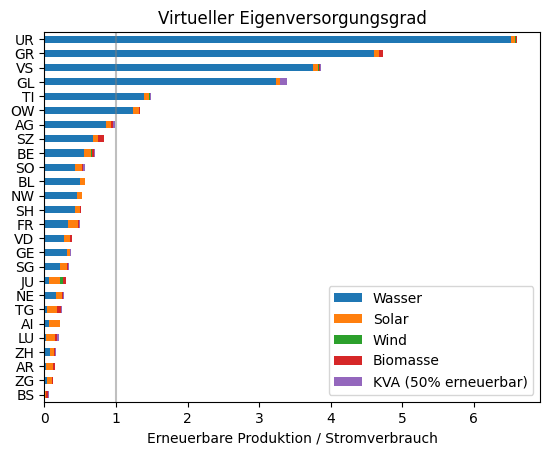

In [138]:
# Virtueller Eigenversorgungsgrad:

df = canton_df.query("energyreporter_date=='2024-04-30'").set_index('canton')[[
    'elec_consumption_mwh_per_year', 'renelec_production_mwh_per_year',
    'renelec_production_water_mwh_per_year',
    'renelec_production_solar_mwh_per_year','renelec_production_wind_mwh_per_year', 
    'renelec_production_biomass_mwh_per_year', 'renelec_production_waste_mwh_per_year'
]].copy()

df['tot'] = df.renelec_production_mwh_per_year / df.elec_consumption_mwh_per_year
df['Wasser'] = df.renelec_production_water_mwh_per_year / df.elec_consumption_mwh_per_year
df['Solar'] = df.renelec_production_solar_mwh_per_year / df.elec_consumption_mwh_per_year
df['Wind'] = df.renelec_production_wind_mwh_per_year / df.elec_consumption_mwh_per_year
df['Biomasse'] = df.renelec_production_biomass_mwh_per_year / df.elec_consumption_mwh_per_year
df['KVA (50% erneuerbar)'] = df.renelec_production_waste_mwh_per_year / df.elec_consumption_mwh_per_year

df.sort_values('tot')[[
    'Wasser', 'Solar', 'Wind', 'Biomasse', 'KVA (50% erneuerbar)'
]].plot(kind='barh', stacked=True)

plt.plot([1,1], [-1,26], c='grey', alpha=0.5)
plt.ylabel('')
plt.xlabel('Erneuerbare Produktion / Stromverbrauch')
plt.title('Virtueller Eigenversorgungsgrad')
plt.show()